# Estadísticas de uso de la aplicación UNLPimage

A lo largo de esta presentación en Jupyer Notebook haremos un análisis del uso de la aplicación _UNLPimage_ generada en el contexto del _Seminario de Lenguaje: Python_ de la carrera de Lic. en Informática de la UNLP. Por tanto, todo el análisis será realizado usando _python_ y sus herramientas.

Este análisis estará dividido en dos partes: una primera parte enfocada en la relación de cada usuario con la aplicación, es decir qué funcionalidades de la aplicación fueron usadas, con qué frecuencia, etc. y una segunda parte enfocada en las imágenes que se han manipulado con la aplicación.

### Primero leeremos la información sobre los usuarios registrados
Para eso utilizamos la librería _pandas_ con la que generaremos un _DataFrame_, que nos facilitará el manejo y análisis de los datos leídos.

In [12]:
import os, sys
import pandas as pd


df_users = pd.read_json(os.path.join(sys.path[0], 'src', 'users-data', 'users.json'))

df_users


,Gandalf,Galadriel,Anillo,Leo,Manny,Guybrush,Peter
nombre,Olorin,Galadriel,Anillo Único,Messi,Manu Calavera,Guybrush,Pedro
edad,4789,2147,1789,35,37,28,23
genero,Mago,Femenino,No Binarix,Masculino,Masculino,Prefiero no decirlo,Masculino


# Estadísticas sobre la actividad de los usuarios

Para la primera parte de este análisis estadístico leeremos el archivo "users_logs.csv" generado por la aplicación, en el cuál se muestra en detalle qué interacciones con la aplicación tuvo cada usuario. La información contenida incluye: usuario que realizó la acción en la aplicación, acción realidad, fecha y hora en la que fue realizada y, en los casos en los que es necesario, información adicional sobre la acción realizada.

Generaremos un _DataFrame_, de nuevo usando la librería _pandas_.

In [13]:

df = pd.read_csv(os.path.join(sys.path[0], 'src', 'log', 'users_logs.csv'), encoding='utf-8')

df

,User,Action,Time,Values,Texts
0,Gandalf,Creo nuevo perfil.,04-06-23 17:40:28,NaN,NaN
1,Gandalf,Cerró sesión,04-06-23 17:40:28,NaN,NaN
2,Galadriel,Creo nuevo perfil.,04-06-23 17:40:28,NaN,NaN
3,Galadriel,Cerró sesión,04-06-23 17:40:28,NaN,NaN
4,Anillo,Creo nuevo perfil.,05-06-23 17:42:24,NaN,NaN
...,...,...,...,...,...
69,Gandalf,Creó un collage,19-06-23 11:57:13,"['IMG_20201015_172433_1.jpg', 'IMG_20201015_17...",Perritos de papel
70,Gandalf,Creó un collage,19-06-23 11:58:00,"['IMG-20210305-WA0067.jpg', 'IMG_20220809_1705...",Más animales!
71,Gandalf,Cerró sesión,19-06-23 11:58:04,NaN,NaN
72,Gandalf,Inició sesión.,19-06-23 11:59:46,NaN,NaN


### El primer análisis que haremos será el de contabilizar la actividad de cada usuario, armando un histograma que contenga el desglose de las acciones realizadas por cada uno de los usuarios. 

Utilizaremos la librería _matplotlib_ para realizar este gráfico como todos los de esta presentación.
No contabilizaremos todas las acciones realizadas por los usuarios sino aquellas que nos resultan de particular interés para hacer este estudio. A saber:
- Guardar información en las imágenes contenidas en el directorio seleccionado como repositorio
- Modificar información en estás mismas imágenes
- Editar el perfil
- Modificaciones en la configuración de la aplicación
- Utilización de la funcionalidad _Generar meme_
- Utilización de la funcionalidad _Crear collage_

In [14]:
#Importamos matplotlib, librería que nos facilitará la generación de los gráficos que haremos de aquí en adelante
import matplotlib.pyplot as plt

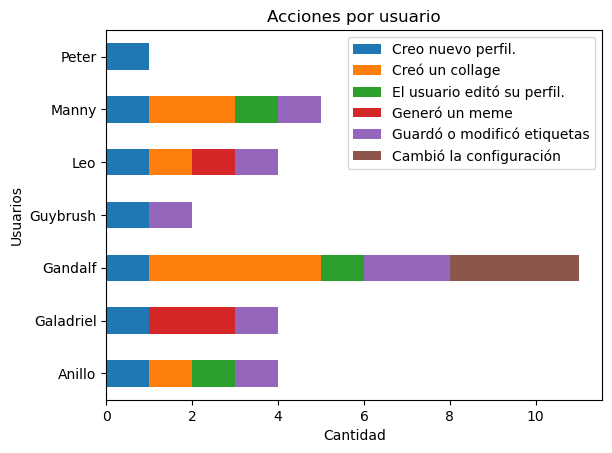

In [15]:
# Defino las acciones que nos interesa graficar

actions = [
    "Guardó información nueva en las imágenes del directorio",
    "Modificó información en las imágenes del directorio"
    "El usuario editó su perfil.",
    "Entró a ventana de configuracion y cambió las rutas",
    "Generó un meme"
    "Creó un collage"
]


# Agrupo los valores del DataFrame por usuario y acción. Luego con .size().unstack(fill_value=0) hago la cuenta
# de cuántas veces cada usuario realizó una determinada acción.
action_counts = df.groupby(["User", "Action"]).size().unstack(fill_value=0)

# Elimino las repeticiones de usuarios
users = action_counts.index

# Combino todas las acciones en las etiquetas, sin importar si fueron nuevas o modificaciones.

action_counts["Guardó o modificó etiquetas"] = action_counts["Guardó información nueva en las imágenes del directorio"] + \
                              action_counts["Modificó información en las imágenes del directorio"]

#Cambio la key para una mejor visualización.

action_counts["Cambió la configuración"] = action_counts["Entró a ventana de configuracion y cambió las rutas"]

#No me interesa graficar algunas acciones, así que las exlcuyo:
excluded_actions = [
    'Cerró sesión',
    'Abrió la ventana de etiquetas pero no generó etiquetas',
    'Inició sesión.',
    'Entró a ventana de Ayuda',
    'Entró a ventana de configuracion y no realizó cambios',
    'Entró a generar un collage pero no lo guardó.',
    'Entró a generar un meme y no lo generó.',
    'El usuario entro a editar perfil pero no lo editó.',
    'Guardó información nueva en las imágenes del directorio',
    'Modificó información en las imágenes del directorio',
    'Entró a ventana de configuracion y cambió las rutas'
]
action_counts = action_counts.drop(excluded_actions, axis=1, errors='ignore') 
# errors = 'ignore' por si alguna de las acciones nunca fue realizada

# Grafico el histograma.

action_counts.plot(kind='barh', stacked=True)

plt.xlabel('Cantidad')
plt.ylabel('Usuarios')
plt.title('Acciones por usuario')
plt.legend(loc='upper right')
plt.show()

### Luego contabilizaremos las acciones realizadas, en total y sin distinguir por usuario.
De todas las acciones registradas en el log, no nos interesa mostrar las acciones, entre ellas: "Inició Sesión", "Cerró Sesión", "Abrió la ventana de etiquetas pero no generó etiquetas".
Mostraremos en un histograma la cantidad de veces que se realizó cada acción considerada.

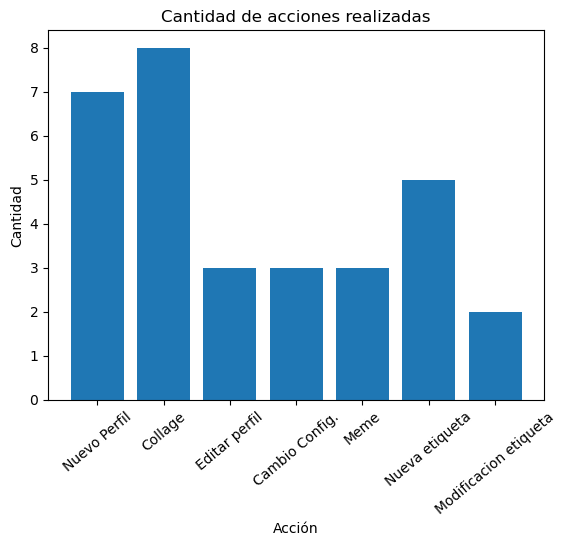

In [16]:
#Excluimos del DataFrame las acciones que no nos interesan
exclude_values = ['Cerró sesión', 'Abrió la ventana de etiquetas pero no generó etiquetas', 'Inició sesión.',
                  'Entró a ventana de Ayuda', 'Entró a ventana de configuracion y no realizó cambios' , 'Entró a generar un collage pero no lo guardó.',
                  'Entró a generar un meme y no lo generó.', 'El usuario entro a editar perfil pero no lo editó.' ]
filtered_df = df[~df['Action'].isin(exclude_values)]

#Contamos cada acción realizada y las ordenamos. 
value_counts = filtered_df['Action'].value_counts()
value_counts = value_counts.sort_index(ascending=True)

plt.bar(value_counts.index, value_counts.values)

# Definimos labels, nombres de ejes y título del gráfico.
labels = ['Nuevo Perfil','Collage','Editar perfil', 'Cambio Config.', 'Meme',  'Nueva etiqueta', 'Modificacion etiqueta']
plt.xticks(value_counts.index, labels)
plt.xticks(rotation=40)
plt.xlabel('Acción')
plt.ylabel('Cantidad')
plt.title('Cantidad de acciones realizadas')
plt.show()

### Como siguiente paso, haremos un gráfico de torta mostrando qué porcentaje de generación de etiquetas (tanto nuevas como modificaciones) fue realizado por género de los usuarios registrados.

Primero, detectamos con qué géneros se han registrado los usuarios.

Recordemos que el programa permite elegir entre diferentes opciones, pero si el usuario no se siente identificado con ninguna de las opciones, puede introducir una nueva opción. De esta manera, no sabemos a priori cuáles son las opciones posibles de géneros en el log.


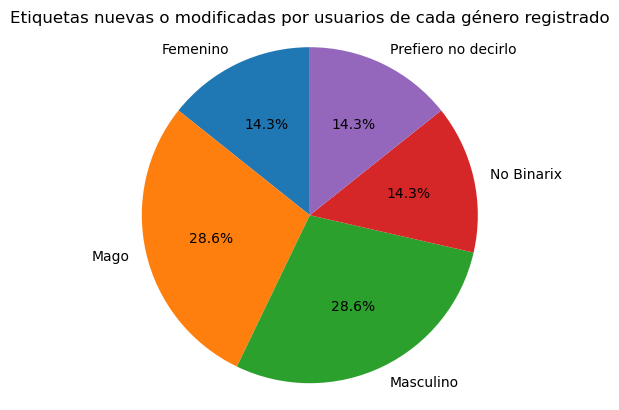

In [23]:
gens = []
for name in df["User"]:
    gens.append(df_users[name]["genero"])
df["Generos"] = gens

gen_unicos = df['Generos'].unique()

# Agrupo el DataFrame por Generos y calculo las acciones realizadas por cada uno de los registrados en el programa
action_counts = df[df["Action"].isin(["Guardó información nueva en las imágenes del directorio", "Modificó información en las imágenes del directorio"])].groupby("Generos").size()

# Hago el gráfico de torta
action_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title("Etiquetas nuevas o modificadas por usuarios de cada género registrado")
plt.ylabel('')
plt.show()

### Finalmente, estudiaremos cuántas acciones se realizaron según el día de la semana. Para ello haremos un histograma con la cantidad de acciones hechas en cada día.

Usaramos la función _to_datetime()_ de _pandas_ y el atributo _day_name()_ para encontrar el día de la semana de una dada fecha.

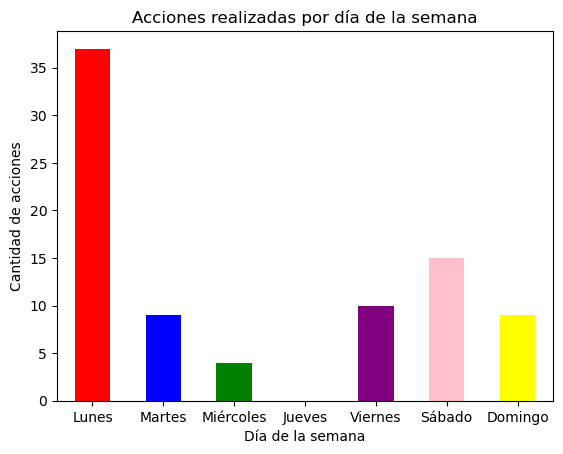

In [43]:
#Como la salida de day_name() es en inglés, haremos un mapeo para traducir los nombres de los días.

weekday_mapping = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%y %H:%M:%S')

#Usamos la función map para realizar el mapeo definido previamente
df['DayOfWeek'] = df['Time'].dt.day_name().map(weekday_mapping)
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)


#Usamos Categorical con ordered = True porque sólo usaremos los nombres de los 7 días de la semana y queremos
#que sean mostrados en orden en el gráfico. De otra manera, los mostraría ordenados según la cantidad de acciones en cada día.


actions_by_day = df['DayOfWeek'].value_counts().sort_index()


actions_by_day.plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])


plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de acciones')
plt.title('Acciones realizadas por día de la semana')
plt.xticks(rotation=0)

plt.show()



# Estadísticas sobre las imágenes manipuladas usando la aplicación UNLPimage.

Para la primera parte del estudio leeremos el archivo _tags.csv_ generado por la aplicación, en el cuál se muestra qué imágenes fueron etiquetadas usando la aplicación. Además, seguiremos usando el archivo _users_log.csv_ puesto que tenemos información sobre los memes y los collages creados usando UNLPimage, sobre los que también trabajaremos.

La información contenida en _tags.csv_ incluye: ruta de la imagen etiquetada, descripción de la imagen, su resolución, tamaño en KB, formato, etiquetas generadas, usuario que realizó la última modificación en la imagen, y fecha y hora en la que fue realizada.

Generaremos un DataFrame, de nuevo usando la librería pandas.



In [44]:
df_tags = pd.read_csv(os.path.join(sys.path[0], 'src', 'users-data', 'tags.csv'), encoding='utf-8')

df_tags

,path,description,resolution,size,mimetype,tags,last user,last edit time
0,../Pictures/The-Lord-of-the-Rings.jpg,NaN,"(1200, 748)",115.4 KB,image/jpeg,"LOTR, Comunidad",Galadriel,17-06-23 17:51:57
1,../Pictures/anillomano.jpg,NaN,"(1200, 900)",65.6 KB,image/jpeg,"Anillo, LOTR, Único",Anillo,17-06-23 17:54:26
2,../Pictures/comarca.jpg,NaN,"(1500, 1001)",97.6 KB,image/jpeg,"Comarca, LOTR",Anillo,17-06-23 17:54:32
3,../Pictures/Maradona-Mundial_86_con_la_copa.JPG,NaN,"(272, 399)",35.5 KB,image/jpeg,"Diego, Argentina, Fútbol",Leo,17-06-23 17:55:57
4,../Pictures/campeones.jpg,NaN,"(720, 405)",58.4 KB,image/jpeg,"Qatar, Fútbol, Argentina",Leo,17-06-23 17:56:14
5,../Pictures/Grim-Fandango.jpg,NaN,"(1280, 720)",496.1 KB,image/jpeg,"Juego, Grim Fandango, Aventura",Manny,17-06-23 17:58:47
6,../Pictures/guybrush2.png,Yo de joven,"(360, 652)",6.6 KB,image/png,"Juego, Guybrush Threepwood",Guybrush,17-06-23 18:01:28
7,../Pictures/mordor.jpg,Dibujo de Mordor,"(540, 360)",54.5 KB,image/jpeg,"LOTR, Mordor",Guybrush,17-06-23 18:01:39
8,../Pictures/alrihla.jpg,Pelota del mundial Qatar 2022,"(1200, 1200)",294.3 KB,image/jpeg,"Qatar, Fútbol, Pelota",Guybrush,17-06-23 18:01:48
9,../Pictures/rivendell.jpg,Frodo en Rivendell,"(1600, 844)",780.1 KB,image/jpeg,LOTR,Guybrush,17-06-23 18:01:58


### Como primera estadística, veremos en un gráfico de torta qué formatos de imagenes se utilizaron y en qué proporción.

Basta con seleccionar las columnas que nos interesan y usar la función _plt.pie_ de _matplotlib_.

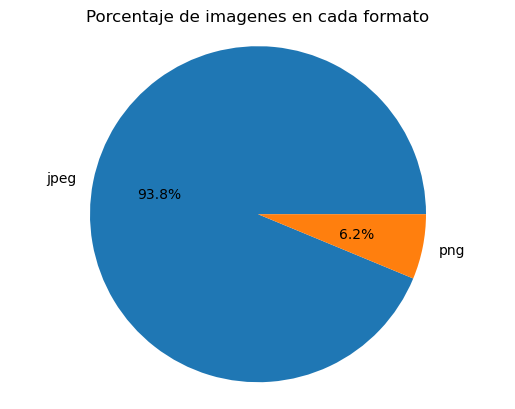

In [45]:
category_counts = df_tags['mimetype'].value_counts(normalize=True) * 100
categories_unique = df_tags['mimetype'].unique()
names = []

for text in categories_unique:
#Acomodamos la columna de formato para que solo se quede con lo que está luego de la /
    names.append(text.split("/")[1])

plt.pie(category_counts, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Porcentaje de imagenes en cada formato')

plt.show()

### Luego, nos interesa ver cuál es el máximo alto y el máximo ancho de las imágenes usadas. 
Para eso, primero acomodamoslos valores de la columna del DataFrame para tener separados el alto y el ancho, utilizando la librería _re_ y generando expresiones regulares que nos permitan separar como deseamos estos valores. Luego, con la función _max()_ buscamos el máximo valor de cada uno. También está mostrado como buscaríamos el mismo, pero sólo se escriben los resultados del máximo.

Utilizamos la librería IPython.display para mostrar mejor los resultados obtenidos.

In [46]:
import re
from IPython.display import HTML

resolutions = df_tags['resolution'].tolist()

first_elements = [int(re.findall(r'\((\d+)', res)[0]) for res in resolutions]

max_value_height = max(first_elements)
min_value_height = min(first_elements)

last_elements = [int(re.findall(r'\(\d+, (\d+)\)', res)[0]) for res in resolutions]

max_value_wide = max(last_elements)
min_value_wide = min(last_elements)

formatted_result_height = f"{max_value_height:.2f}"
formatted_result_wide = f"{max_value_wide:.2f}"

styled_result_height = f"<span style='color: black; font-size: 28px; font-family: Arial, sans-serif;'>Máximo alto: {formatted_result_height}</span>"
styled_result_wide = f"<span style='color: black; font-size: 28px; font-family: Arial, sans-serif;'>Máximo ancho: {formatted_result_wide}</span>"

display(HTML(styled_result_height))
display(HTML(styled_result_wide))


### Siguiendo con el tamaño de las imágenes, haremos un gráfico en el que mostramos la distribución de resoluciones.

Para conseguirlo, simplemente utilizamos la función _scatter()_ de _matplotlib_

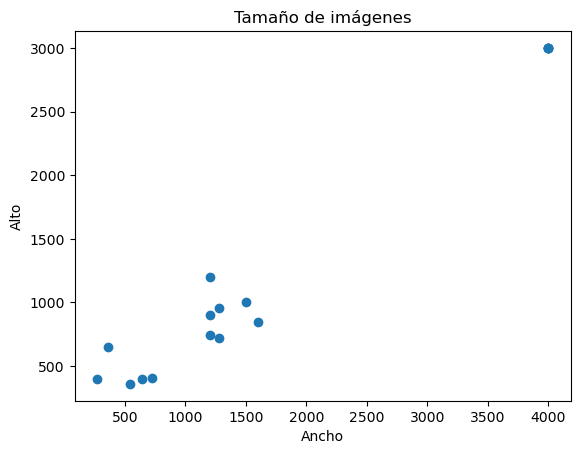

In [47]:
plt.scatter(first_elements,last_elements)

plt.title('Tamaño de imágenes')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

### Como último análisis de las imágenes del repositorio, calcularemos el tamaño en KB promedio de las imágenes incluidas por cada usuario.

La mayor dificultad se encuentra en darle el formato adecuado a la columna df_tags['size'] para convertir sus valores a números y que puedan ser procesados correctamente. Para hacerlo, usaremos la función _match_ de la librería _re_.



In [48]:
import re
from functools import reduce

# Creamos una función para detectar si el tamaño de la imagen fue guardado en KB o en MB
def detect_unit(value):
    if 'KB' in value:
        return 'KB'
    elif 'MB' in value:
        return 'MB'
    else:
        return None

# Convierto el valor de la columna size a float
def convert_to_float(value, unit):
    if unit == 'KB':
        return float(value)
    elif unit == 'MB':
        return float(value) * 1024
    else:
        return None

# Nos quedamos con los usuarios, eliminando las repeticiones en el DataFrame
users = df_tags['last user'].unique()
size_user = []
filtered_values = []
float_numbers = []
rank = []

# Generamos la lista de tamaños de imagen para cada usuario.
for name in users:
    # Convertimos a float los valores de estos tamaños, usando re.match() y luego float() usando una comprehension list.
    sizes = df_tags.loc[df_tags['last user'] == name, 'size']
    unit = detect_unit(sizes.iloc[0]) if not sizes.empty else None
    if unit:
        float_numbers.append([convert_to_float(num, unit) for num in str(sizes).split(' ') if re.match(r'^\d+(\.\d+)?$', num)])

# Calculamos los promedios. Usamos la función zip() para iterar simultáneamente en los valores y su usuario respectivo
for sizes, names in zip(float_numbers, users):
    # Usamos la función reduce() para quedarnos solo con el valor promedio, calculado con una función lambda
    lst_avg = round(reduce(lambda x, y: x + y, sizes) / len(sizes),2) #Redondeamos a 2 decimales para mejor visualización
    rank.append((names, lst_avg))

# Ordenamos en orden decreciente los valores
rank = sorted(rank, key=lambda x: x[1], reverse=True)

# Aplicamos la división y actualizamos los valores y etiquetas
for index in range(len(rank)):
    if rank[index][1] > 1024:
        rank[index] = (rank[i][0], rank[index][1] / 1024, 'MB')
    else:
        rank[index] = (rank[i][0], rank[index][1], 'KB')

df_aux = pd.DataFrame(rank, columns=['Usuario', 'Tamaño Promedio de imagen', 'Unidad'])
df_aux['Tamaño Promedio de imagen'] = df_aux.apply(lambda row: f"{row['Tamaño Promedio de imagen']} {row['Unidad']}", axis=1)
df_aux = df_aux.drop('Unidad', axis=1)

df_aux.index = df_aux.index + 1
df_aux

,Usuario,Tamaño Promedio de imagen
1,Manny,250.55 KB
2,Guybrush,196.0 KB
3,Galadriel,57.7 KB
4,Anillo,54.73 KB
5,Leo,32.3 KB
6,Gandalf,11.75 KB


### Pasemos ahora a estudiar las salidas de la aplicación. Veamos primero cuáles son las etiquetas más utilizadas por los usuarios.

Para hacerlo, armaremos una lista con todas las listas de etiquetas y, usando la librería _collections_, en particular su función _Counter()_, contaremos las repeticiones de cada etiqueta y mostraremos con el atributo _most_common_() los 3 elementos más repetidos.

In [49]:
import ast
from collections import Counter
tags = []
tags_aux = df_tags['tags'].tolist()

for item in tags_aux:
    words = item.split(', ')
    tags.extend(words)

count = Counter(tags)
top = count.most_common(3)

# Convertimos la salida a un DataFrame para visualizarla en formato tabla.
df_top = pd.DataFrame(top, columns=['Tag', 'Count'])


df_top.index = df_top.index + 1

df_top

,Tag,Count
1,LOTR,5
2,Origami,5
3,Fútbol,3


### Luego, haremos un gráfico similar al último de la sección anterior. En este caso, mostraremos en qué días de la semana se crearon o modificaron etiquetas de las imágenes, en lugar de mostrar todas las acciones realizadas.

La manera de realizarlo es muy similar, simplmente cambiaremos las condiciones del filtrado de datos.

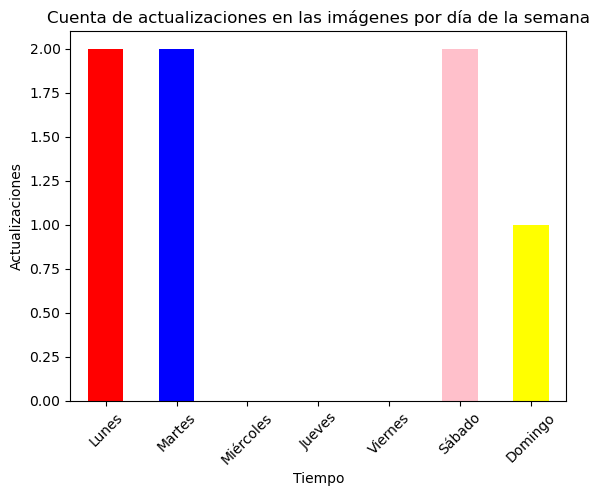

In [50]:
condition = ((df["Action"] == "Guardó información nueva en las imágenes del directorio") | (df["Action"] == "Modificó información en las imágenes del directorio"))
filtered_df = df[condition]

count = (pd.to_datetime(filtered_df['Time'], format='%d-%m-%y %H:%M:%S')).dt.day_name().map(weekday_mapping)#.value_counts().sort_index()

count = pd.Categorical(count, categories=day_order, ordered=True)
(count.value_counts().sort_index()).plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])


plt.xlabel('Tiempo')
plt.ylabel('Actualizaciones')
plt.title('Cuenta de actualizaciones en las imágenes por día de la semana')
plt.xticks(rotation=45)
plt.show()

### Nos interesa, también, saber la cuenta acumulativa de actualizaciones en las imágenes, es decir la suma total de creación o modificación de etiquetas a lo largo del tiempo.

En este caso, no nos interesa el día de la semana sino la fecha. Así que solamente convertiremos a _timestamp_ la columna df['Time'] con _pd.to_datetime()_.

Luego, filtraremos el _DataFrame_ procurando solamente tener en cuenta las acciones de creación o modificación de etiquetas.

Finalmente, haremos el gráfico con _plt.plot()_ de la librería _matplotlib_.

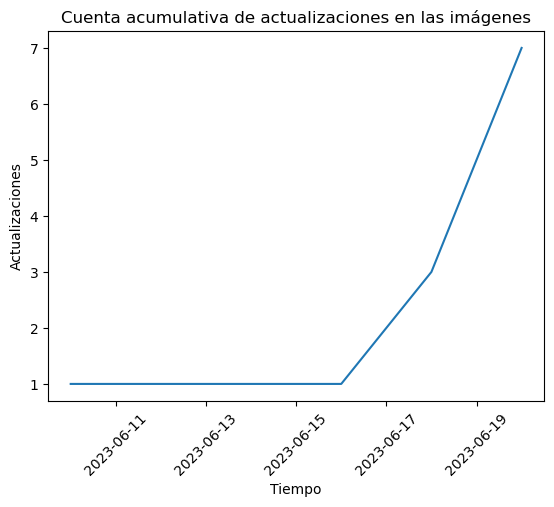

In [51]:
#Convertimos a Timestamp
df['Timestamp'] = pd.to_datetime(df['Time'])

#Aplicacmos la condición de filtrado de datos
condition = ((df["Action"] == "Guardó información nueva en las imágenes del directorio") | (df["Action"] == "Modificó información en las imágenes del directorio"))
filtered_df = df[condition]

#Usamos groupby(key ='Tiemstamp', freq='D') para agrupar las filas de filtered_df por dia.
#Luego con .size().cumsum() calculamos la suma acumulada de cada grupo generado.
grouped_df = filtered_df.groupby(pd.Grouper(key='Timestamp', freq='D')).size().cumsum()

#Finalmente, con plt.plot() graficamos los datos procesados.
plt.plot(grouped_df.index, grouped_df.values)
plt.xlabel('Tiempo')
plt.ylabel('Actualizaciones')
plt.title('Cuenta acumulativa de actualizaciones en las imágenes')
plt.xticks(rotation=45)
plt.show()

### Contaremos ahora cuántas veces fue utilizada cada imagen para crear memes.
Mostraremos las 5 más utilizadas.

In [52]:
condition = (df["Action"] == "Generó un meme") 
filtered_df = df[condition]

tags = []
tags_aux = filtered_df['Values'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

#Armo una lista única con todas las listas generadas en tags_aux
single_list = [item for sublist in tags for item in sublist]

#Cuento cuántas veces se ha utilizado cada imagen y muestro las 5 más usadas.
count = Counter(single_list)
top = count.most_common(5)

#Genero un DataFrame para mostrar la salida en formato tabla.
df_aux = pd.DataFrame(top, columns=['Imagen', 'Cantidad de usos en memes'])
df_aux.index = df_aux.index + 1

df_aux

,Imagen,Cantidad de usos en memes
1,Batman_golpea_robin.png,1
2,novio_mira_otra_mujer.png,1
3,seguro_esta_pensando_en_otra.png,1


### Hacemos lo mismo pero con las imágenes usadas para collages.

In [53]:
condition = (df["Action"] == "Creó un collage") 
filtered_df = df[condition]
filtered_df
from collections import Counter
tags = []
tags_aux = filtered_df['Values'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = [item for sublist in tags for item in sublist]

count = Counter(single_list)
top = count.most_common(5)

df_aux = pd.DataFrame(top, columns=['Imagen', 'Cantidad de usos en collages'])
df_aux.index = df_aux.index + 1

df_aux

,Imagen,Cantidad de usos en collages
1,anillomano.jpg,4
2,The-Lord-of-the-Rings.jpg,2
3,comarca.jpg,2
4,Maradona-Mundial_86_con_la_copa.JPG,2
5,Grim-Fandango.jpg,2


## Para finalizar, generaremos nubes de palabras a partir de las etiquetas, collages y memes generados por los usuarios.

### Para hacerlo, usaremos la librería _wordcloud_, en particular las funciones _WordCloud_ y _STOPWORDS_.

In [54]:
from wordcloud import WordCloud, STOPWORDS

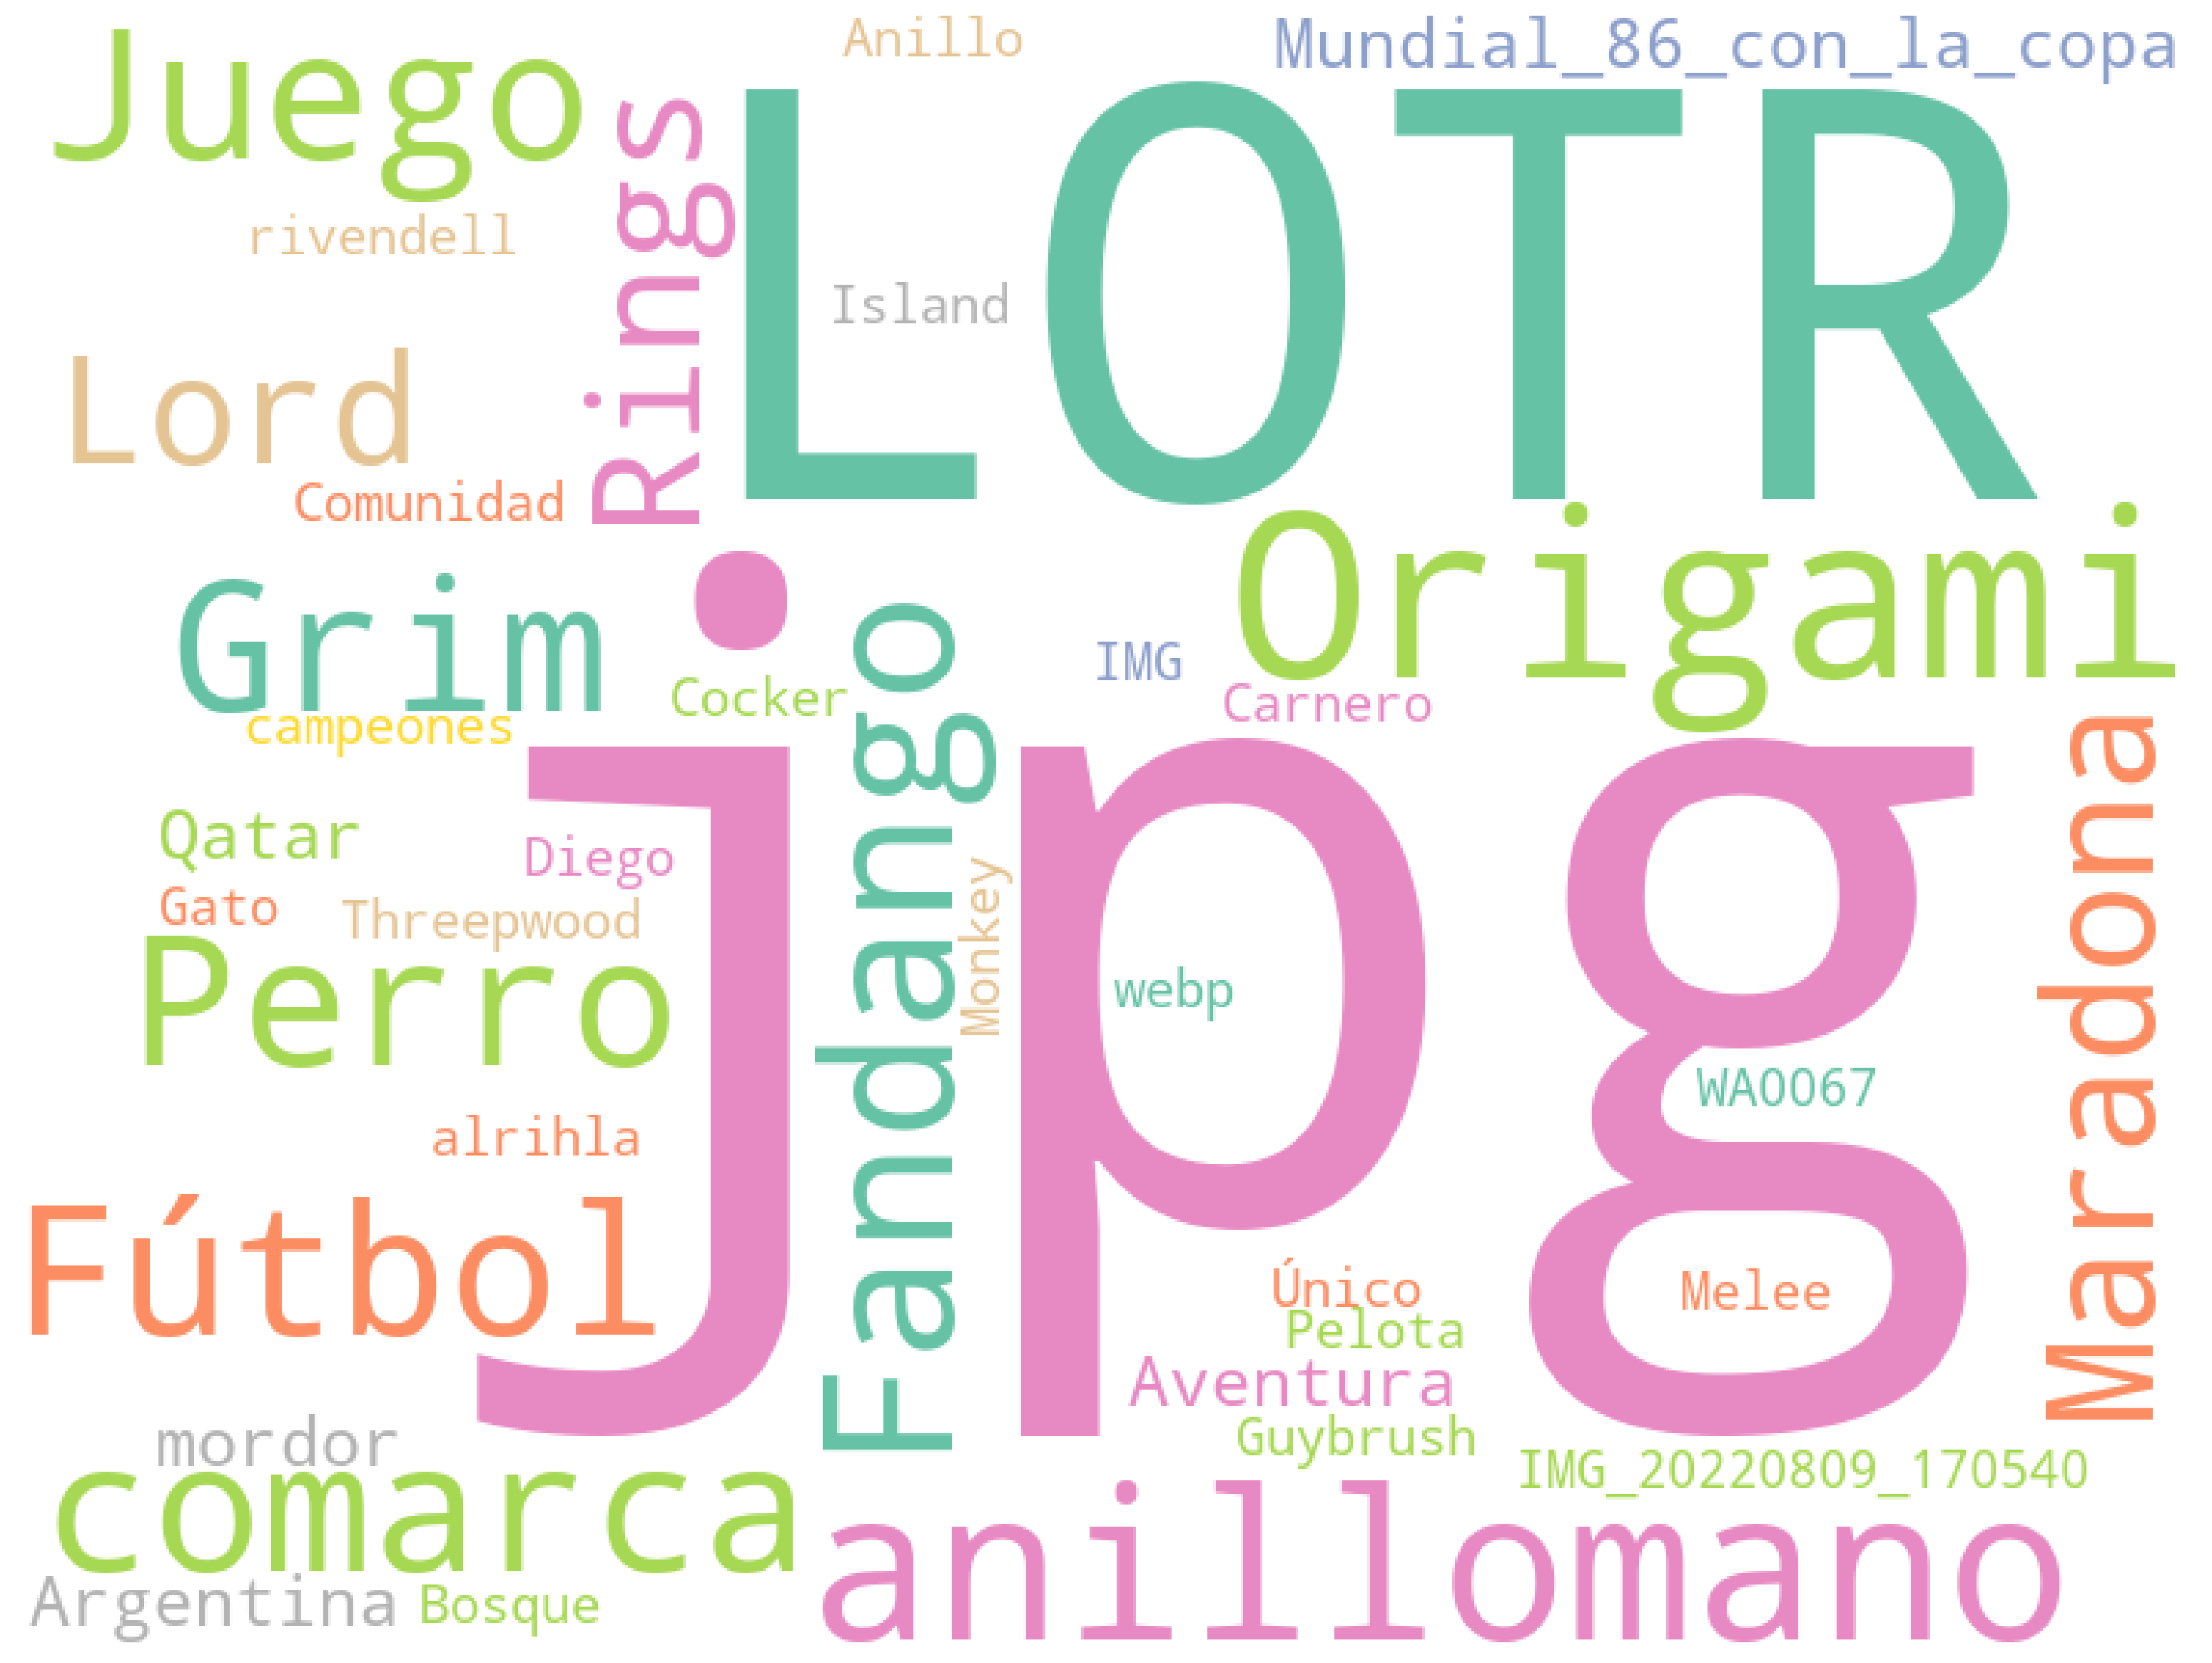

In [55]:
#Crearemos una lista única a partir de todas las listas de etiquetas generadas.
#Para ello, primero generamos la lista tags_aux a partir del DataFrame, usando el atributo .tolist().
tags_aux = df_tags['tags'].tolist()

#Luego, usamos nuevamente la librería ast y su función litearl_eval() para asegurarnos convertir la lista
#que se lee como string a un objeto lista en nuestro código.
for item in tags_aux:
    words = item.split(', ')
    tags.extend(words)
    
    
# Definimos la función para graficar la nube de palabras
def plot_cloud(wordcloud):
    # Establecemos el tamaño de la figura
    plt.figure(figsize=(40, 30))
    # Mostramos la imagen
    plt.imshow(wordcloud) 
    # Eliminamos los ejes.
    plt.axis("off");

#Convertimos la lista a string. Sacamos los corchetes y las comillas con replace().
text = str(tags)

text = text.replace("'", "").replace("[", "").replace("]", "").replace("jpeg", "").replace("png", "")

# Generamos la nube de palabras
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Graficamos
plot_cloud(wordcloud)

### Hacemos lo mismo con los textos incluidos en los memes generados.

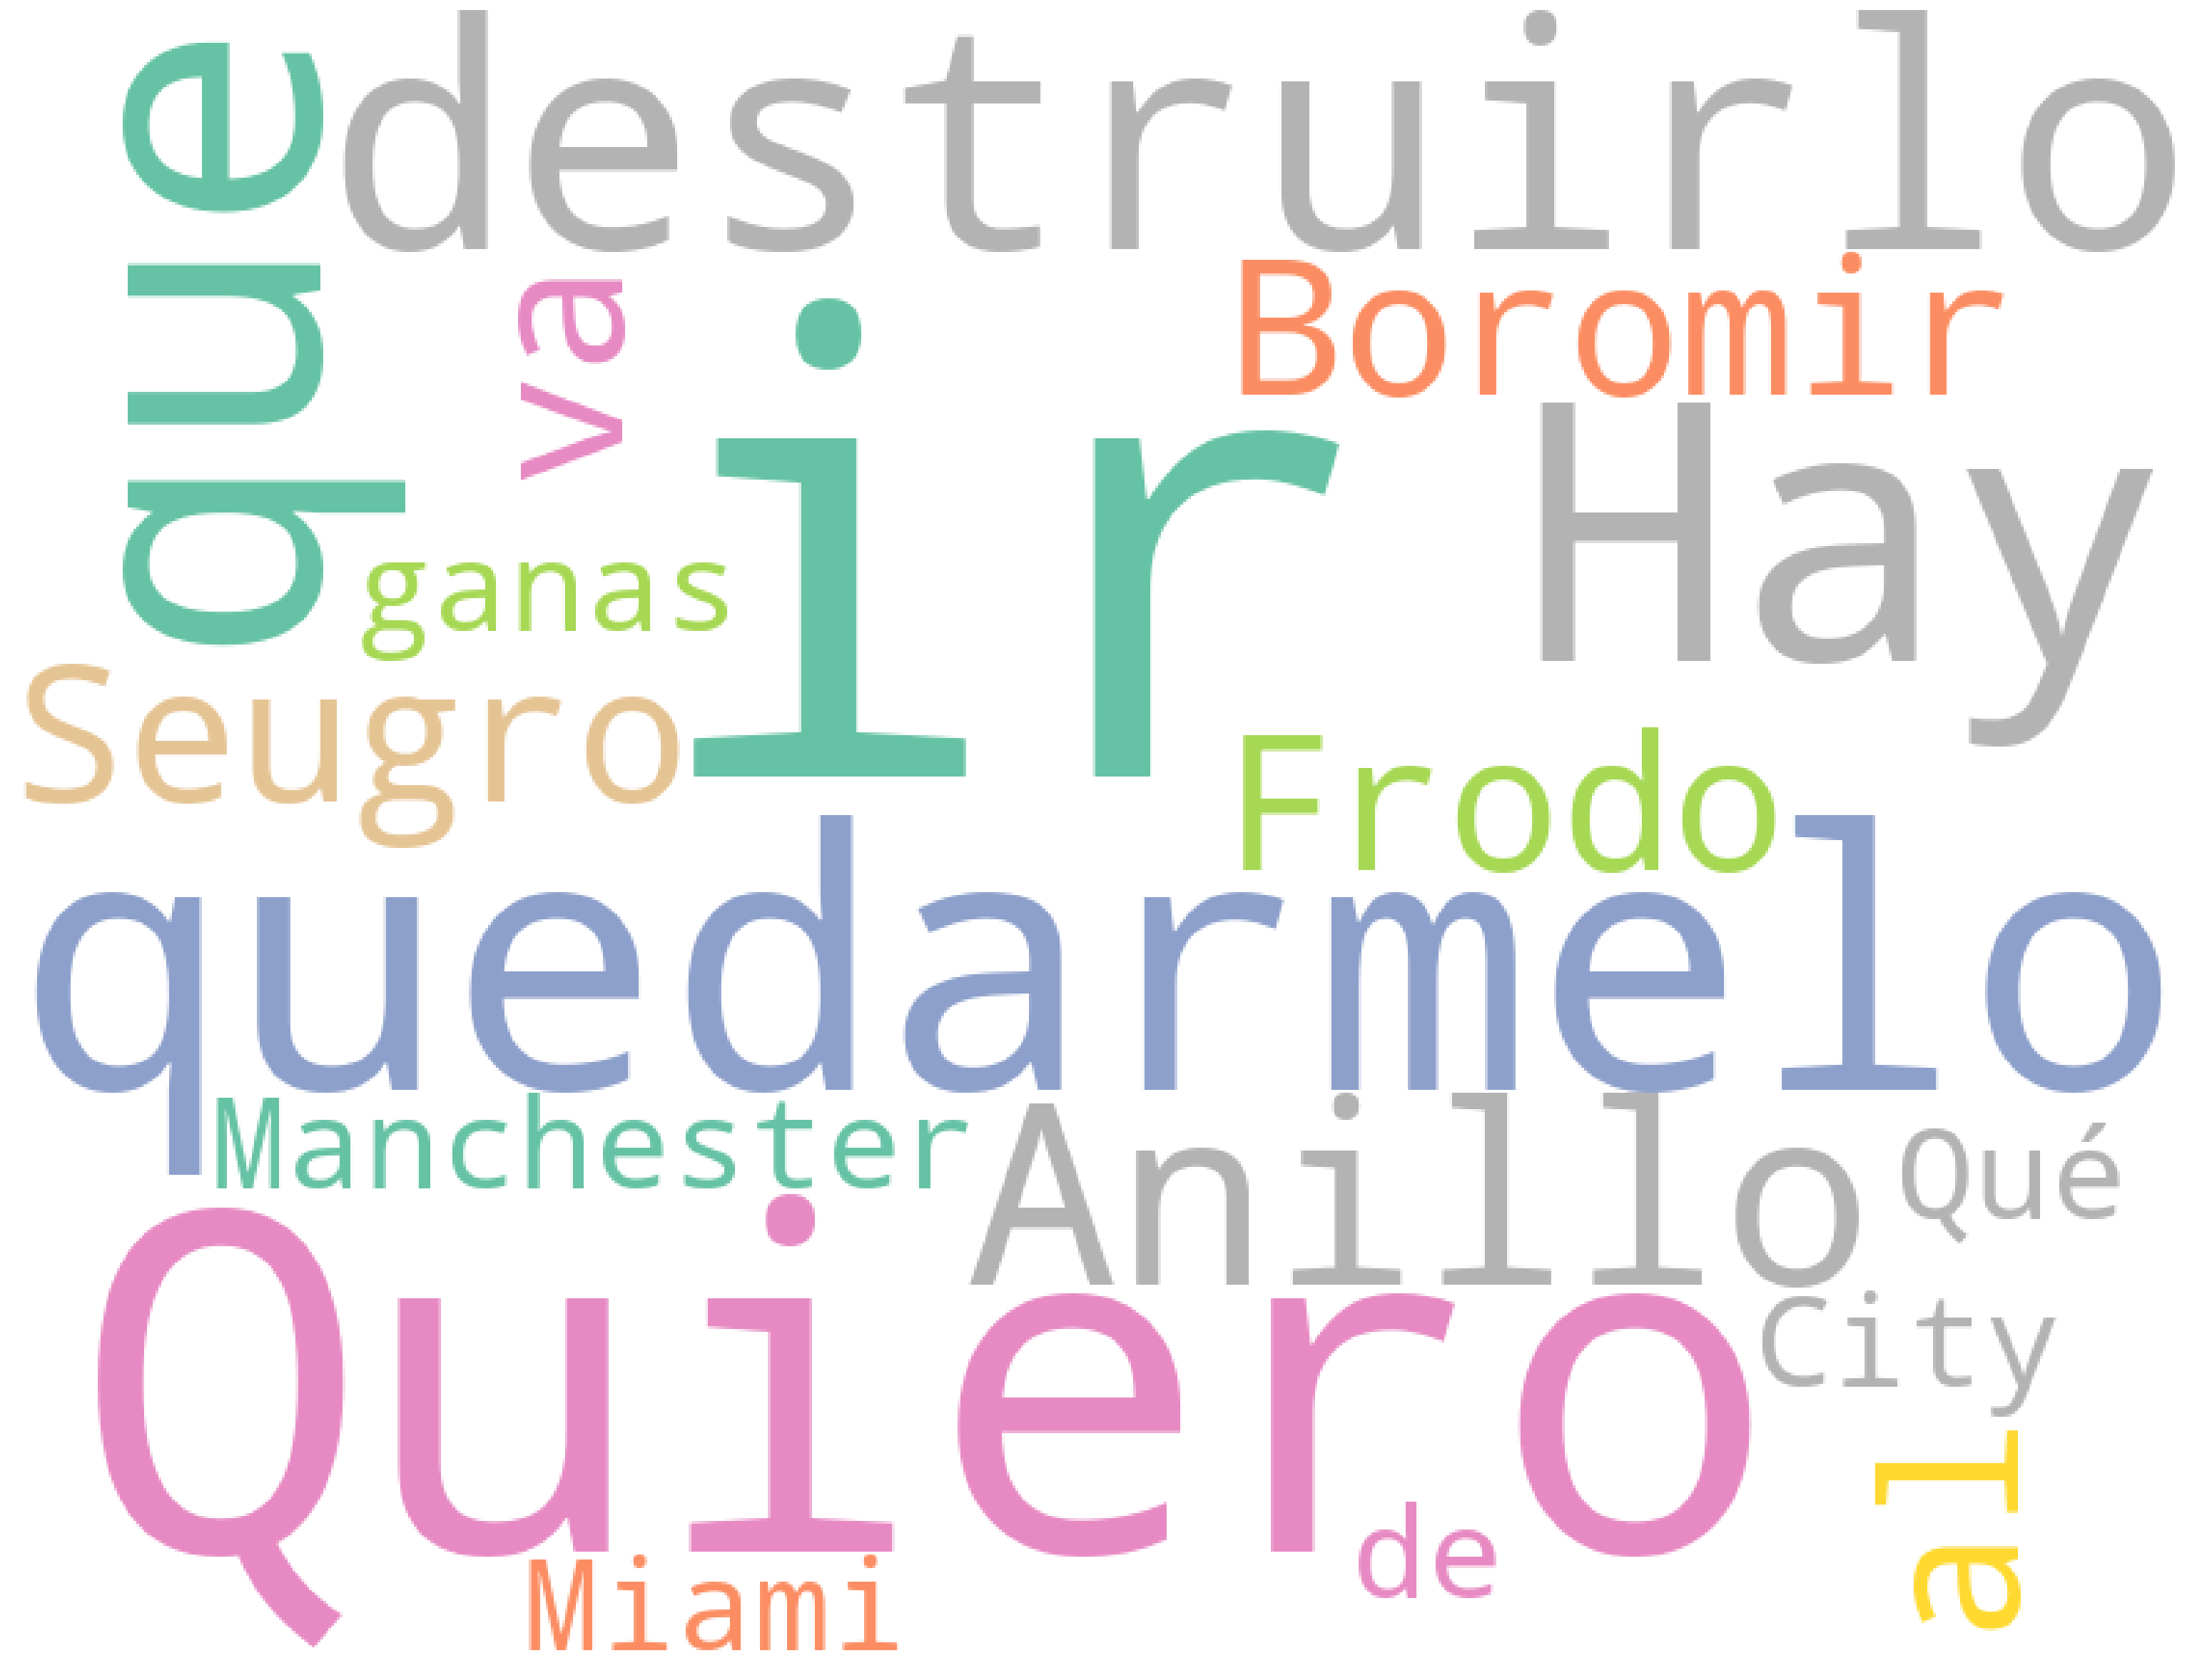

In [56]:
condition = (df["Action"] == "Generó un meme") 
filtered_df = df[condition]


def plot_cloud(wordcloud):

    plt.figure(figsize=(40, 30))

    plt.imshow(wordcloud) 

    plt.axis("off");
text = str(filtered_df['Texts'].tolist())
text = text.replace("'", "").replace("[", "").replace("]", "")

wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)

### Finalmente, generamos una nube de palabras con los textos utilizados en las descripciones de los collages generados por los usuarios.

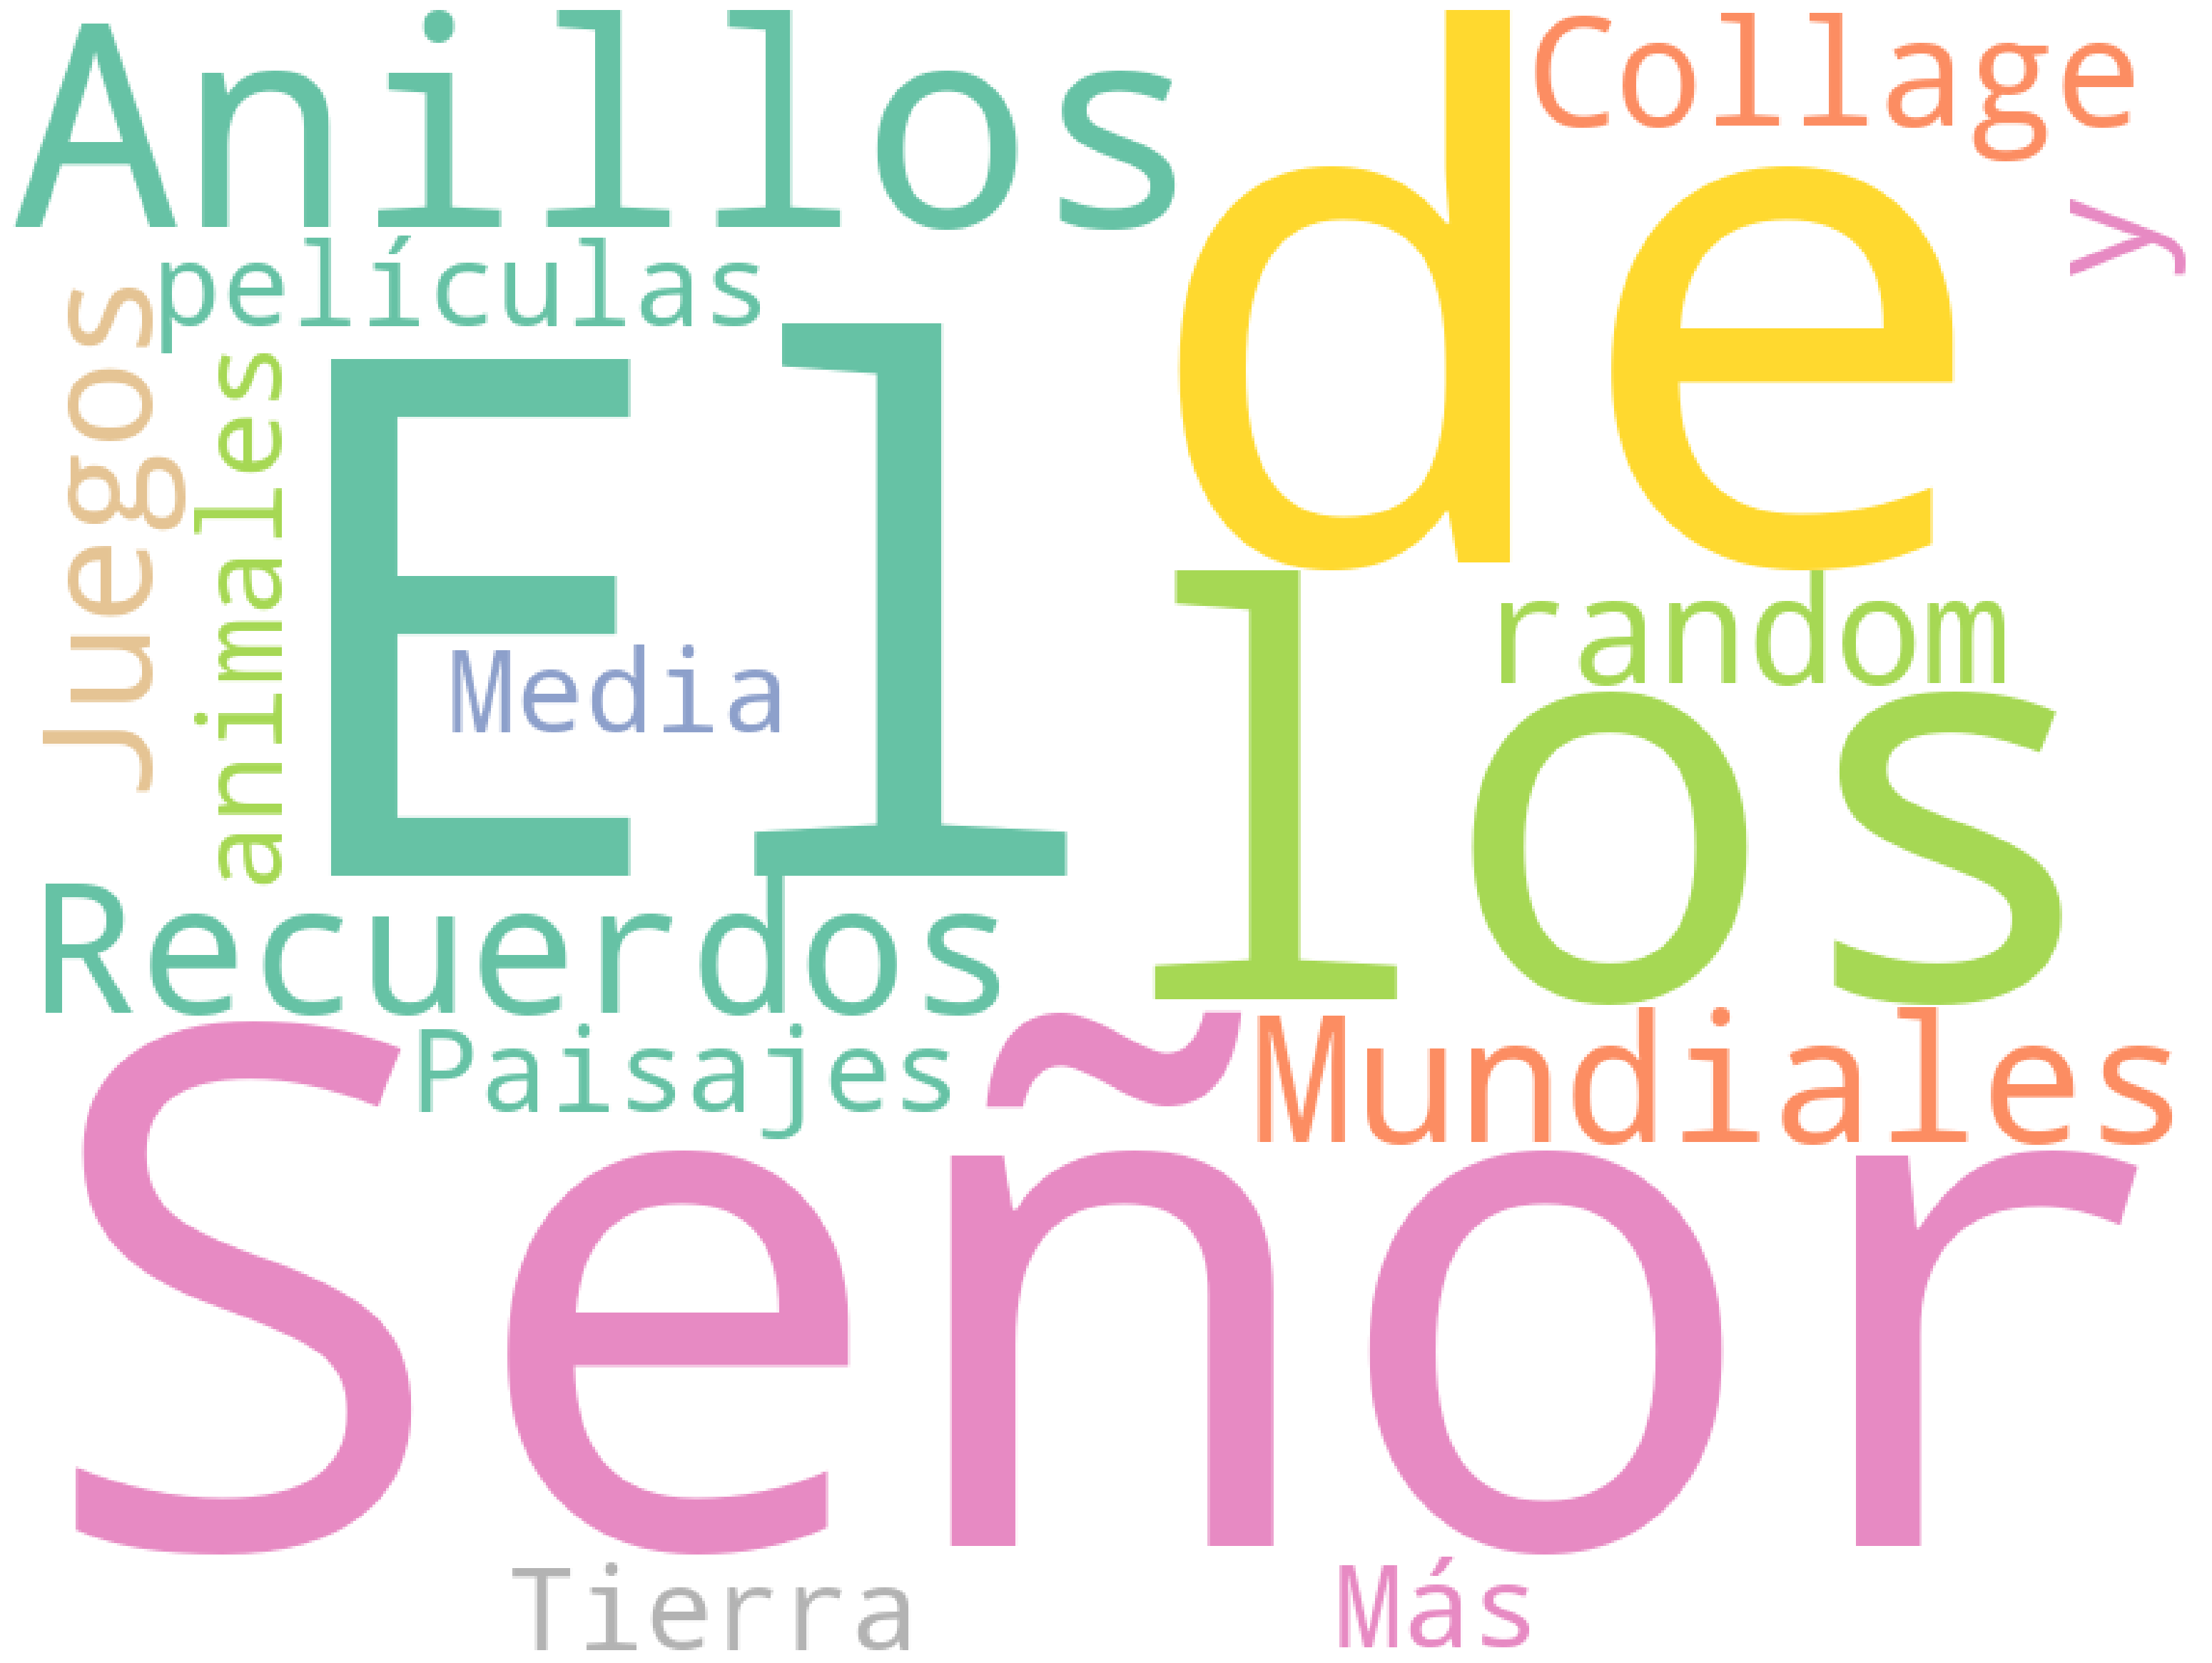

In [57]:
condition = (df["Action"] == "Creó un collage") 
filtered_df = df[condition]


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
text = str(filtered_df['Texts'].tolist())
text = text.replace("'", "").replace("[", "").replace("]", "").replace("nan","")
#print(text)
# Generate wordcloud
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)